## Anton Nikolaev Mini-project
In this project we maximize a function with multiple local maxima using evolutionary optimization mechanism made from scratch

In [3]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Below we identify the objective function

In [4]:
def objective_function(x):
    return np.sin(x) * x - np.cos(2 * x / 3 - 1) * x - np.exp(np.absolute(x / 10))

### Our space is quasi-real numbers
You can see below how the objective function look like

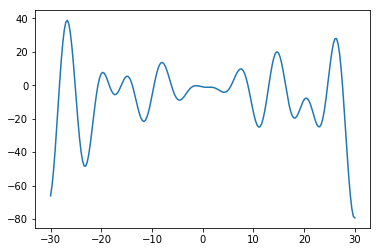

In [5]:
space = np.linspace(-30, 30, num = 200)
plt.plot(space, objective_function(space))
plt.show()

### Variation operator takes geometric mean of noised parents

In [40]:
def geometric_mean(x, y):
    return ((x*y)/(x+y))

def arithmetic_mean(x, y):
    return (x + y) / 2

def mutation_1(population, epsilon):
    """Variation operator does both mutation and recombination"""
    best = selection_1(population, 10, objective_function)

    for i in best:
        for j in best:
            population = np.append(population, geometric_mean(i + np.random.normal(0, epsilon),
                                                               j + np.random.normal(0, epsilon)))
    return population

### Selection operator is simple ranking with truncation

In [41]:
def selection_1(population, num, metric):
    """Selection operator does performance ranking selection
    on the values that fall into allowed interval [-100, 100]"""
    new = np.argsort(objective_function(population))
    result = population[new][::-1]
    result = result[result < 100]
    result = result[result > -100]

    return result[:num], result[0], result[-1]

### In the next cell we initialize population, run 100 generations of optimization and gather performance data
Different epsilon can result in different optimization results after that many steps

In [42]:
population = np.linspace(-20, 20, num = 20)

worst = np.zeros(1000)
best = np.zeros(1000)
means = np.zeros(1000)

for i in range(1000):

    population, best[i], worst[i] = selection_1(population, 20, metric = objective_function)
    means[i] = np.mean(objective_function(population))
    population = mutation_1(population, epsilon = 1.5)
    

print (objective_function(selection_1(population, 1, objective_function)[0]),
       selection_1(population, 1, objective_function)[0])

/home/antonio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[ 29.15885876] [-27.45523821]


### Objective function in the best member and in mean, blue and green respectively

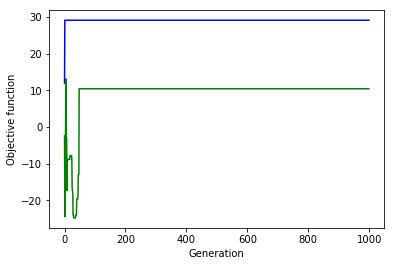

In [43]:
plt.plot(range(1000), objective_function(best), '-b', range(1000),
         objective_function(means), '-g')
plt.xlabel("Generation")
plt.ylabel("Objective function")
plt.show()

### Objective function in the worst member
Put separately because the scale is significantly different from best and mean. It is a direct result of choice of mutation operator.

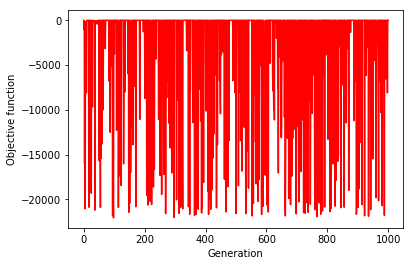

In [45]:
plt.plot(range(1000), objective_function(worst), "-r")
plt.xlabel("Generation")
plt.ylabel("Objective function")
plt.show()

### Red dots represent best 5 members of the population
As we can see, some part of the population is in local maximum

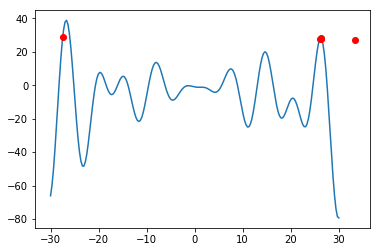

In [46]:
space = np.linspace(-30, 30, num = 200)
winners =  selection_1(population, 5, objective_function)[0]
plt.plot(space, objective_function(space), '-',
         winners, objective_function(winners), 'ro')
plt.show()